
## 인공신경망 활용
-----
- pytorch를 사용하여 기본적인 인공신경망을 생성하여 이미지 분류기를 생성합니다.
- 데이터셋: [Fashion MNIST](https://pytorch.org/vision/0.9/datasets.html#fashion-mnist)

- **reference**
    - https://tutorials.pytorch.kr/beginner/basics/buildmodel_tutorial.html
    - https://tutorials.pytorch.kr/beginner/basics/data_tutorial.html

## Fashion MNIST Classifier
----
Fashion MNIST 데이터셋을 사용하여 옷의 품목을 구분하는 분류기를 신경망을 사용하여 구현해봅니다.

# 1번
- 필요한 모듈을 모두 이곳에 나열하세요
- 2점

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader


# 2번
- FashionMNIST 데이터(train, test)를 불러오세요
- 2점

In [ ]:
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())    # FashionMNIST 데이터셋 생성
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

100%|██████████| 26421880/26421880 [00:01<00:00, 16323658.18it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 308136.80it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5509818.11it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 4880713.61it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



# 3번
- train, test DataLoader를 만듭니다.
- 배치사이즈: 64
- 2점

In [ ]:
batch_size = 64
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)    #batch 64인 데이터 로더 생성
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# 4번
- Device 설정은 GPU로 합니다
- 2점

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cpu


# 5번
- train, test의 shape를 확인합니다.
- 2점

In [ ]:
# train.shape
for images, labels in train_loader:
    print("train shape:", images.shape)
    break

# test.shape
for images, labels in test_loader:
    print("test shape:", images.shape)              # 데이터 배치 크기 확인
    break

train shape: torch.Size([64, 1, 28, 28])
test shape: torch.Size([64, 1, 28, 28])


# 6번
- train, test의 첫번째 인덱스 데이터를 이미지로 확인합니다.
- 2점

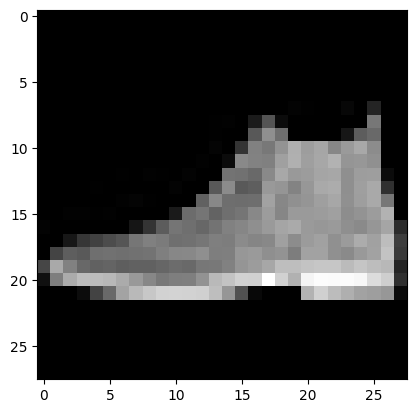

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(images[0].squeeze(), cmap='gray')
plt.show()                 # 이미지들의 첫번째[0] 인덱스를 불러와서 시각화

# 7번
- 아래 코드를 실행해서 labels_map 객체를 딕셔너리로 생성합니다.
- 2점

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

# 8번
- 2행 5열로 train 데이터를 이미지로 출력합니다.
- labels_map를 이용하여 이미지의 label도 함께 출력합니다.
- 2점

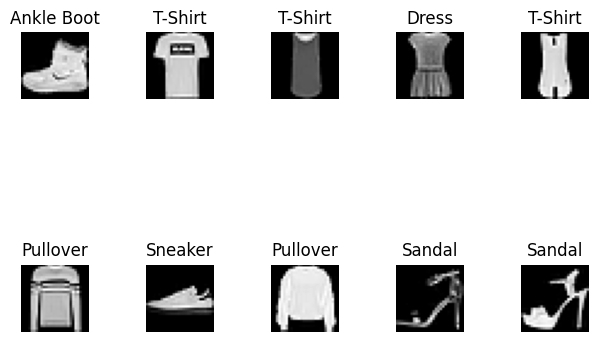

In [ ]:
fig, axs = plt.subplots(2, 5)
fig.tight_layout()

for i in range(2):
    for j in range(5):
        axs[i, j].imshow(train_dataset[i * 5 + j][0].squeeze(), cmap='gray')
        axs[i, j].set_title(labels_map[train_dataset[i * 5 + j][1]])
        axs[i, j].axis('off')
plt.show()   # 반복문을 돌면서 전체 이미지 시각화


# 9번
- reference를 참고하여 인공신경망 클래스를 설계합니다.
- 2점

In [ ]:
class SimpleNN(nn.Module):             # flatten이미지로 28x28형식으로 구성
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(28*28, 128)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x

# 10번
- 인공신경망 객체를 GPU에 저장합니다.
- 2점

In [ ]:
model = SimpleNN().to(device)
model

SimpleNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (linear2): Linear(in_features=128, out_features=10, bias=True)
)

# 11번
- 28*28 텐서를 GPU에 만들어 인공신경망에 input으로 넣어줍니다.
- 학습되지 않은 모델의 예측 결과를 출력합니다.
- 3점

In [ ]:
input_tensor = torch.randn(1, 1, 28, 28).to(device)
output = model(input_tensor)
print(output.argmax(dim=1))

tensor([3])


# 12번
- 예측값을 소프트맥스 함수를 넣고 가장 높은 확률의 값을 출력합니다.
- 3점

In [ ]:
softmax = nn.Softmax(dim=1)
probabilities = softmax(output)
print(probabilities.argmax(dim=1).item())

3


# 13번
- Loss 함수를 정의합니다.
- 학습률을 0.001로 설정합니다.
- 옵티마이저는 Adam을 사용합니다.
- 3점

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 14번
- 학습 함수를 train_loop로 작성합니다.
- 매개변수(데이터로더, 모델, loss 함수, 옵티마이저)
- 데이터로더의 인덱스가 배치사이즈마다 loss를 출력합니다.
- 3점

In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        optimizer.zero_grad()
        predictions = model(X)
        loss = loss_fn(predictions, y)
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            print(f"Batch {batch}, Loss: {loss.item()}")

# 15번
- 테스트 함수를 test_loop로 작성합니다.
- 매개변수(데이터로더, 모델, loss 함수)
- 데이터로더의 크기만큼 반복하며 loss를 출력하고 전체 accuracy와 평균 loss를 구합니다.
- 3점

In [ ]:
def test_loop(dataloader, model, loss_fn):
    total_loss = 0.0
    correct = 0
    total_samples = len(dataloader.dataset)

    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            predictions = model(X)
            loss = loss_fn(predictions, y)
            total_loss += loss.item()
            correct += (predictions.argmax(dim=1) == y).sum().item()

    accuracy = correct / total_samples
    avg_loss = total_loss / len(dataloader)

    print(f"Accuracy: {accuracy * 100:.2f}%, Loss: {avg_loss:.4f}")
    return accuracy, avg_loss

# 16번
- 100번의 epochs를 돌며 학습을 반복합니다.
- 3점

In [ ]:
num_epochs = 100
for epoch in range(10, num_epochs+10, 10):
    print(f"Epoch {epoch}/{num_epochs}")
    train_loop(train_loader, model, criterion, optimizer)


Epoch 10/100
Batch 0, Loss: 2.3355441093444824
Batch 100, Loss: 0.7645013928413391
Batch 200, Loss: 0.5619125366210938
Batch 300, Loss: 0.5279879570007324
Batch 400, Loss: 0.4076599180698395
Batch 500, Loss: 0.4367648661136627
Batch 600, Loss: 0.4509979784488678
Batch 700, Loss: 0.3592275381088257
Batch 800, Loss: 0.4370090365409851
Batch 900, Loss: 0.4196336567401886
Epoch 20/100
Batch 0, Loss: 0.39304032921791077
Batch 100, Loss: 0.49307048320770264
Batch 200, Loss: 0.5773922801017761
Batch 300, Loss: 0.332813024520874
Batch 400, Loss: 0.45125359296798706
Batch 500, Loss: 0.32660534977912903
Batch 600, Loss: 0.4124055504798889
Batch 700, Loss: 0.282652348279953
Batch 800, Loss: 0.35194623470306396
Batch 900, Loss: 0.2890757620334625
Epoch 30/100
Batch 0, Loss: 0.29573166370391846
Batch 100, Loss: 0.4567488729953766
Batch 200, Loss: 0.2976480722427368
Batch 300, Loss: 0.2356151044368744
Batch 400, Loss: 0.3899969160556793
Batch 500, Loss: 0.4210946559906006
Batch 600, Loss: 0.38178592

# 17번
- 학습된 파라미터를 저장합니다.
- 파일명은 model_weights.pth로 합니다.
- 3점

In [ ]:
torch.save(model.state_dict(), 'model_weights.pth')

# 18번
- 새로운 인공신경망을 GPU에 만들고 위 학습된 파일(model_weights.pth)을 불러옵니다.
- 3점

In [ ]:
new_model = SimpleNN().to(device)
new_model.load_state_dict(torch.load('model_weights.pth'))
new_model

SimpleNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (linear2): Linear(in_features=128, out_features=10, bias=True)
)

# 19번
- 위 모델에 test 데이터로더를 입력하고 결과를 확인합니다.
- 3점

In [ ]:
test_accuracy, test_loss = test_loop(test_loader, new_model, criterion)
print(f"Accuracy Result : {test_accuracy * 100:.2f}%, Loss Result : {test_loss:.4f}")

Accuracy: 88.02%, Loss: 0.3425
Accuracy Result : 88.02%, Loss Result : 0.3425


# 20번
- 2행 5열로 test 데이터를 이미지로 출력합니다.
- 학습된 모델이 분류기가 잘 작동하는지 label과 예측된 결과를 동시에 출력합니다.
- 3점

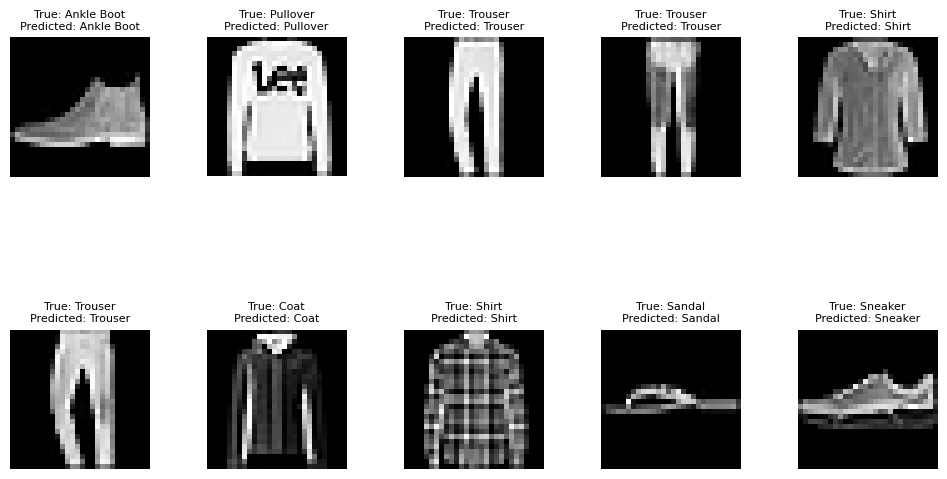

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(10, 6))
fig.tight_layout()

for i in range(2):
    for j in range(5):
        img, label = test_dataset[i * 5 + j]
        img = img.unsqueeze(0).to(device)
        output = new_model(img)
        predicted_class = output.argmax(dim=1).item()

        axs[i, j].imshow(img.squeeze().cpu(), cmap='gray')
        axs[i, j].set_title(f"True: {labels_map[label]}\nPredicted: {labels_map[predicted_class]}", fontsize=8)
        axs[i, j].axis('off')

plt.show()
